In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /root/.kaggle/
!cp /content/drive/MyDrive/Colab\ Notebooks/Kaggle/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d gpiosenka/100-bird-species
!unzip 100-bird-species.zip
!rm -r ./dataset
!mkdir ./dataset
!mv ./test ./dataset/test
!mv ./train ./dataset/train
!mv ./valid ./dataset/valid

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train/WHITE TAILED TROPIC/139.jpg  
  inflating: train

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Rescaling, Dropout, BatchNormalization
from keras.models import Sequential
from keras import layers
import os
import time
import numpy as np

In [ ]:
train_dir = os.path.join('.','dataset','train')
test_dir = os.path.join('.','dataset','test')
val_dir = os.path.join('.','dataset','valid')
random_seed = 123
batch_size = 16
IMG_SIZE = (224,224)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    seed = random_seed,
    shuffle = True,
    validation_split = 0.2,
    subset = 'training',
    batch_size = batch_size,
    image_size = IMG_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    seed = random_seed,
    shuffle = False,
    validation_split = 0.2,
    subset = 'validation',
    batch_size = batch_size,
    image_size = IMG_SIZE
)

Found 84635 files belonging to 525 classes.
Using 67708 files for training.
Found 84635 files belonging to 525 classes.
Using 16927 files for validation.


## Explorando el dataset de entrenamiento

Tratamos de visualizar la cantidad de elementos por clase, para verificar que no estén (muy) desbalanceadas.

In [ ]:
num_classes = 525

# @tf.function
# def count_class(counts, batch):
#     y, _, c = tf.unique_with_counts(batch[1])
#     return tf.tensor_scatter_nd_add(counts, tf.expand_dims(y, axis=1), c)

# train_counts = train_ds.reduce(
#     initial_state=tf.zeros(num_classes, tf.int32),
#     reduce_func=count_class)

# val_counts = val_ds.reduce(
#     initial_state=tf.zeros(num_classes, tf.int32),
#     reduce_func=count_class)

In [ ]:
class_names = train_ds.class_names
# print(class_names)
# fig, ax = plt.subplots(2,1)
# fig.set_size_inches(16,9)
# ax[0].bar(class_names,train_counts)
# ax[0].set_title("Train set counts")
# ax[1].bar(class_names, val_counts)
# ax[1].set_title("Validation set counts")
# ax[0].tick_params(axis='x', labelrotation = 90)
# ax[1].tick_params(axis='x', labelrotation = 90)
# plt.show()

Tomamos algunas imagenes del dataset para visualizarlas:

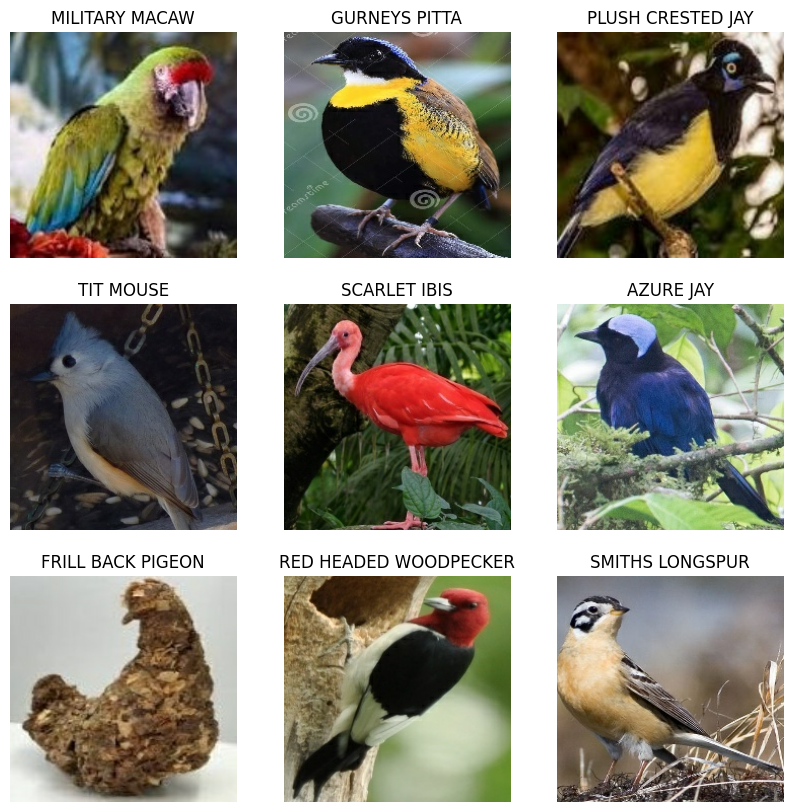

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [ ]:
for x, y in train_ds.take(1):
  print(x.shape, y)

(16, 224, 224, 3) tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(16, 525), dtype=float32)


Finalmente cargamos nuestro dataset de entrenamiento:

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
                    directory= test_dir,
                    labels = 'inferred',
                    label_mode = 'categorical',
                    seed=random_seed,
                    shuffle=False,
                    batch_size=batch_size,
                    image_size = (224,224)
)

Found 2625 files belonging to 525 classes.


## Evaluando el modelo preentrenado de Kaggle

In [ ]:
model = keras.models.load_model('./EfficientNetB0-525-(224 X 224)- 98.97.h5', custom_objects={'F1_score':'F1_score'})

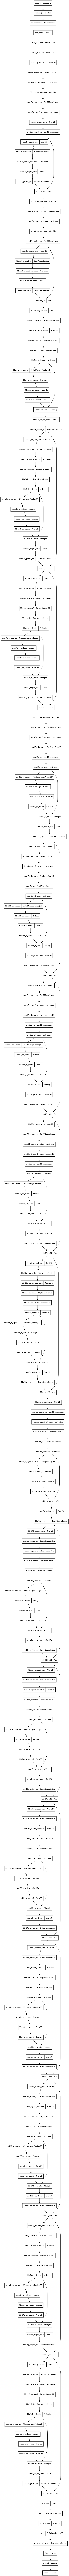

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['normalization[0][0]']   

Probamos el modelo con el dataset de prueba:

In [ ]:
test_pred = model.predict(test_ds)

165/165 [==============================] - 6s 13ms/step


In [ ]:
test_data = test_ds.unbatch()
test_labels = []
for i, (imagen, etiqueta) in enumerate(test_data):
  test_labels.append(np.argmax(etiqueta.numpy()))

In [ ]:
pred_test = np.zeros(len(test_labels))

for id in range(len(test_labels)):
    pred_test[id] = np.argmax( test_pred[id] )

Finalmente, mostramos la exactitud (Accuracy) del modelo:

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

#print(classification_report(test_labels, pred_test))
print(f"Accuracy of the Model: {accuracy_score(test_labels, pred_test)*100:.2f}%")

Accuracy of the Model: 98.97%


## Armando nuestro propio modelo con Transfer Learning

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Cargando nuestro modelo preentrenado, tomando solo la parte convolucional:

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)

modelo_base_EFB3 = tf.keras.applications.EfficientNetV2B3(
    input_shape = IMG_SHAPE, # [96, 128, 160, 192, 224] No acepta imagenes mas grandes
    include_top = False,
    weights     = 'imagenet',
    include_preprocessing = False
)

modelo_base_EFB3.trainable = False

52606240/52606240 [==============================] - 0s 0us/step


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.82793 to fit



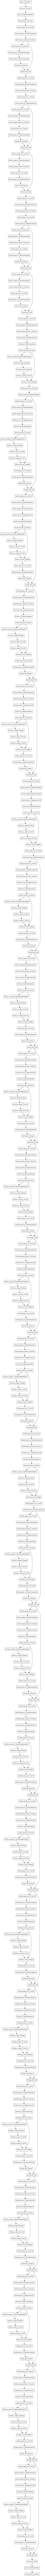

In [ ]:
tf.keras.utils.plot_model(modelo_base_EFB3)

In [ ]:
modelo_base_EFB3.summary()

Model: "efficientnetv2-b3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 40)         1080      ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 40)         160       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 112, 112, 40)         0         ['stem_bn[0][0

In [ ]:
nb_layers = len(modelo_base_EFB3.layers)
print(modelo_base_EFB3.layers[nb_layers - 2].name)
print(modelo_base_EFB3.layers[nb_layers - 1].name)

top_bn
top_activation


Creamos nuestro nuevo modelo a partir del modelo base:

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x =  keras.layers.Rescaling(1./255)(inputs)
# x = keras.layers.LayerNormalization()(x)
x = modelo_base_EFB3(x, training=False)

max_pooling = keras.layers.GlobalMaxPooling2D(name = 'max_pooling')(x)
batch_norm = BatchNormalization(name = 'batch_norm')(max_pooling)
dense_1 = Dense(1000, activation = 'relu', name = 'dense_1')(batch_norm)
#flatten             = Flatten()(x)
drop = Dropout(0.3)(batch_norm)
outputs_EFB3 = Dense(525, activation='softmax', name = 'prediction' )(drop)

modelo_EFB3 = tf.keras.Model(inputs=inputs, outputs=outputs_EFB3)

In [ ]:
modelo_EFB3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-b3 (Functio  (None, 7, 7, 1536)        12930622  
 nal)                                                            
                                                                 
 max_pooling (GlobalMaxPool  (None, 1536)              0         
 ing2D)                                                          
                                                                 
 batch_norm (BatchNormaliza  (None, 1536)              6144      
 tion)                                                           
                                                             

In [ ]:
base_learning_rate = 0.001
modelo_EFB3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss      = tf.keras.losses.CategoricalCrossentropy(),
    metrics   = ['accuracy']
)

In [ ]:
%time  historial = modelo_EFB3.fit(train_ds, validation_data = val_ds, epochs=15,  verbose=1, callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)])

Epoch 1/15
4232/4232 [==============================] - 107s 25ms/step - loss: 0.1461 - accuracy: 0.9553 - val_loss: 0.2096 - val_accuracy: 0.9625
Epoch 2/15
4232/4232 [==============================] - 108s 25ms/step - loss: 0.1363 - accuracy: 0.9598 - val_loss: 0.2014 - val_accuracy: 0.9633
Epoch 3/15
4232/4232 [==============================] - 109s 26ms/step - loss: 0.1262 - accuracy: 0.9624 - val_loss: 0.2018 - val_accuracy: 0.9641
Epoch 4/15
4232/4232 [==============================] - 106s 25ms/step - loss: 0.1148 - accuracy: 0.9655 - val_loss: 0.2017 - val_accuracy: 0.9657
Epoch 5/15
4232/4232 [==============================] - 110s 26ms/step - loss: 0.1104 - accuracy: 0.9667 - val_loss: 0.1937 - val_accuracy: 0.9671
Epoch 6/15
4232/4232 [==============================] - 110s 26ms/step - loss: 0.1021 - accuracy: 0.9689 - val_loss: 0.1938 - val_accuracy: 0.9673
Epoch 7/15
4232/4232 [==============================] - 110s 26ms/step - loss: 0.1025 - accuracy: 0.9692 - val_loss: 0

In [ ]:
def plot_hist_acc(hist):
    plt.plot(hist.history["accuracy"],'r')

    plt.plot(hist.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Categorical Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    #plt.ylim((0,1.1))
    plt.grid()
    plt.show()

def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])

    plt.plot(hist.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss (Categorical Crossentropy)")
    plt.xlabel("Epoch")
    plt.legend(["loss", "val_loss"], loc="upper left")
    #plt.ylim((-0.01,np.max(hist.history["loss"])+0.01))
    plt.grid()
    plt.show()

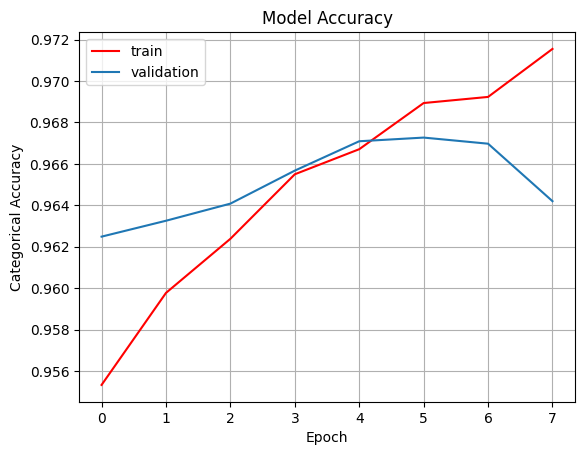

In [ ]:
plot_hist_acc(historial)

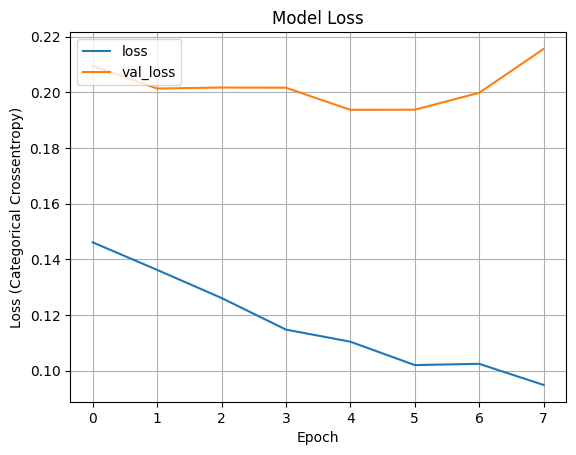

In [ ]:
plot_hist_loss(historial)

In [ ]:
test_pred_B3 = modelo_EFB3.predict(test_ds)

165/165 [==============================] - 3s 18ms/step


In [ ]:
pred_test_B3 = np.zeros(len(test_labels))

for id in range(len(test_labels)):
    pred_test_B3[id] = np.argmax( test_pred_B3[id] )

Verificamos el accuracy de nuestro propio modelo, en este caso obtuvimos un accuracy del 94.4%:

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

#print(classification_report(test_labels, pred_test))
print(f"Accuracy of the Model: {accuracy_score(test_labels, pred_test_B3)*100:.2f}%")

Accuracy of the Model: 93.68%


## Probando el modelo con el set de validación:

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import pandas as pd

In [ ]:
def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier

In [ ]:
valid_df = pd.read_csv('./birds.csv')

In [ ]:
valid_df = valid_df[valid_df['data set'] == 'test']

In [ ]:
valid_df.drop(['class id', 'data set'], axis = 1, inplace = True)

In [ ]:
valid_df['filepaths'] = valid_df['filepaths'].apply(lambda x: './dataset/' + x)

In [ ]:
valid_df.head()

filepaths           labels  \
84635  ./dataset/test/ABBOTTS BABBLER/1.jpg  ABBOTTS BABBLER   
84636  ./dataset/test/ABBOTTS BABBLER/2.jpg  ABBOTTS BABBLER   
84637  ./dataset/test/ABBOTTS BABBLER/3.jpg  ABBOTTS BABBLER   
84638  ./dataset/test/ABBOTTS BABBLER/4.jpg  ABBOTTS BABBLER   
84639  ./dataset/test/ABBOTTS BABBLER/5.jpg  ABBOTTS BABBLER   

            scientific name  
84635  MALACOCINCLA ABBOTTI  
84636  MALACOCINCLA ABBOTTI  
84637  MALACOCINCLA ABBOTTI  
84638  MALACOCINCLA ABBOTTI  
84639  MALACOCINCLA ABBOTTI

In [ ]:
import pandas as pd

In [ ]:
no_dupes_df = valid_df[['labels','scientific name']].drop_duplicates()

In [ ]:
no_dupes_df.sample(10)

labels          scientific name
86705               ROCK DOVE            COLUMBA LIVIA
85525              CUBAN TODY         TODUS MULTICOLOR
86890  SPOTTED WHISTLING DUCK      DENDROCYGNA GUTTATA
85305        CERULEAN WARBLER        SETOPHAGA CERULEA
85360     CINNAMON FLYCATCHER  PYRRHOMYIAS CINNAMOMEUS
85650          EGYPTIAN GOOSE     ALOPOCHEN AEGYPTIACA
87055     VERMILION FLYCATHER    PYROCEPHALUS OBSCURUS
85355         CINNAMON ATTILA       ATTILA CINNAMOMEUS
84705         AMERICAN AVOCET      PSITTACULA EUPATRIA
85230         CALIFORNIA GULL       LARUS CALIFORNICUS

In [ ]:
species_dict_2 = pd.Series(no_dupes_df['scientific name'].values,index=no_dupes_df['labels']).to_dict()

In [ ]:
species_dict_2

{'ABBOTTS BABBLER': 'MALACOCINCLA ABBOTTI',
 'ABBOTTS BOOBY': 'PAPASULA ABBOTTI',
 'ABYSSINIAN GROUND HORNBILL': 'BUCORVUS ABYSSINICUS',
 'AFRICAN CROWNED CRANE': 'BALEARICA REGULORUM',
 'AFRICAN EMERALD CUCKOO': 'CHRYSOCOCCYX CUPREUS',
 'AFRICAN FIREFINCH': 'LAGONOSTICTA RUBRICATA',
 'AFRICAN OYSTER CATCHER': 'HAEMATOPUS MOQUINI',
 'AFRICAN PIED HORNBILL': 'TOCKUS FASCIATUS',
 'AFRICAN PYGMY GOOSE': 'NETTAPUS AURITUS',
 'ALBATROSS': 'DIOMEDEIDAE',
 'ALBERTS TOWHEE': 'PIPILO ABERTI',
 'ALEXANDRINE PARAKEET': 'PSITTACULA EUPATRIA',
 'ALPINE CHOUGH': 'PYRRHOCORAX GRACULUS',
 'ALTAMIRA YELLOWTHROAT': 'GEOTHLYPIS FLAVOVELATA',
 'AMERICAN AVOCET': 'PSITTACULA EUPATRIA',
 'AMERICAN BITTERN': 'BOTAURUS LENTIGINOSUS',
 'AMERICAN COOT': 'FULICA AMERICANA',
 'AMERICAN FLAMINGO': 'PHOENICOPTERUS RUBER',
 'AMERICAN GOLDFINCH': 'SPINUS TRISTIS',
 'AMERICAN KESTREL': 'FALCO SPARVERIUS',
 'AMERICAN PIPIT': 'ANTHUS RUBESCENS',
 'AMERICAN REDSTART': 'SETOPHAGA RUTICILLA',
 'AMERICAN ROBIN': 'TURDUS MIG

In [ ]:
import json
with open('birds.json', 'w') as fp:
    json.dump(species_dict_2, fp)

In [ ]:
# Combinaciones no son correctas
#species_dict = {k: v for k,v in zip(valid_df['labels'].unique(),valid_df['scientific name'].unique())}

In [ ]:
# species_dict

{'ABBOTTS BABBLER': 'MALACOCINCLA ABBOTTI',
 'ABBOTTS BOOBY': 'PAPASULA ABBOTTI',
 'ABYSSINIAN GROUND HORNBILL': 'BUCORVUS ABYSSINICUS',
 'AFRICAN CROWNED CRANE': 'BALEARICA REGULORUM',
 'AFRICAN EMERALD CUCKOO': 'CHRYSOCOCCYX CUPREUS',
 'AFRICAN FIREFINCH': 'LAGONOSTICTA RUBRICATA',
 'AFRICAN OYSTER CATCHER': 'HAEMATOPUS MOQUINI',
 'AFRICAN PIED HORNBILL': 'TOCKUS FASCIATUS',
 'AFRICAN PYGMY GOOSE': 'NETTAPUS AURITUS',
 'ALBATROSS': 'DIOMEDEIDAE',
 'ALBERTS TOWHEE': 'PIPILO ABERTI',
 'ALEXANDRINE PARAKEET': 'PSITTACULA EUPATRIA',
 'ALPINE CHOUGH': 'PYRRHOCORAX GRACULUS',
 'ALTAMIRA YELLOWTHROAT': 'GEOTHLYPIS FLAVOVELATA',
 'AMERICAN AVOCET': 'BOTAURUS LENTIGINOSUS',
 'AMERICAN BITTERN': 'FULICA AMERICANA',
 'AMERICAN COOT': 'PHOENICOPTERUS RUBER',
 'AMERICAN FLAMINGO': 'SPINUS TRISTIS',
 'AMERICAN GOLDFINCH': 'FALCO SPARVERIUS',
 'AMERICAN KESTREL': 'ANTHUS RUBESCENS',
 'AMERICAN PIPIT': 'SETOPHAGA RUTICILLA',
 'AMERICAN REDSTART': 'TURDUS MIGRATORIUS',
 'AMERICAN ROBIN': 'MARECA AMER

1/1 [==============================] - 0s 31ms/step


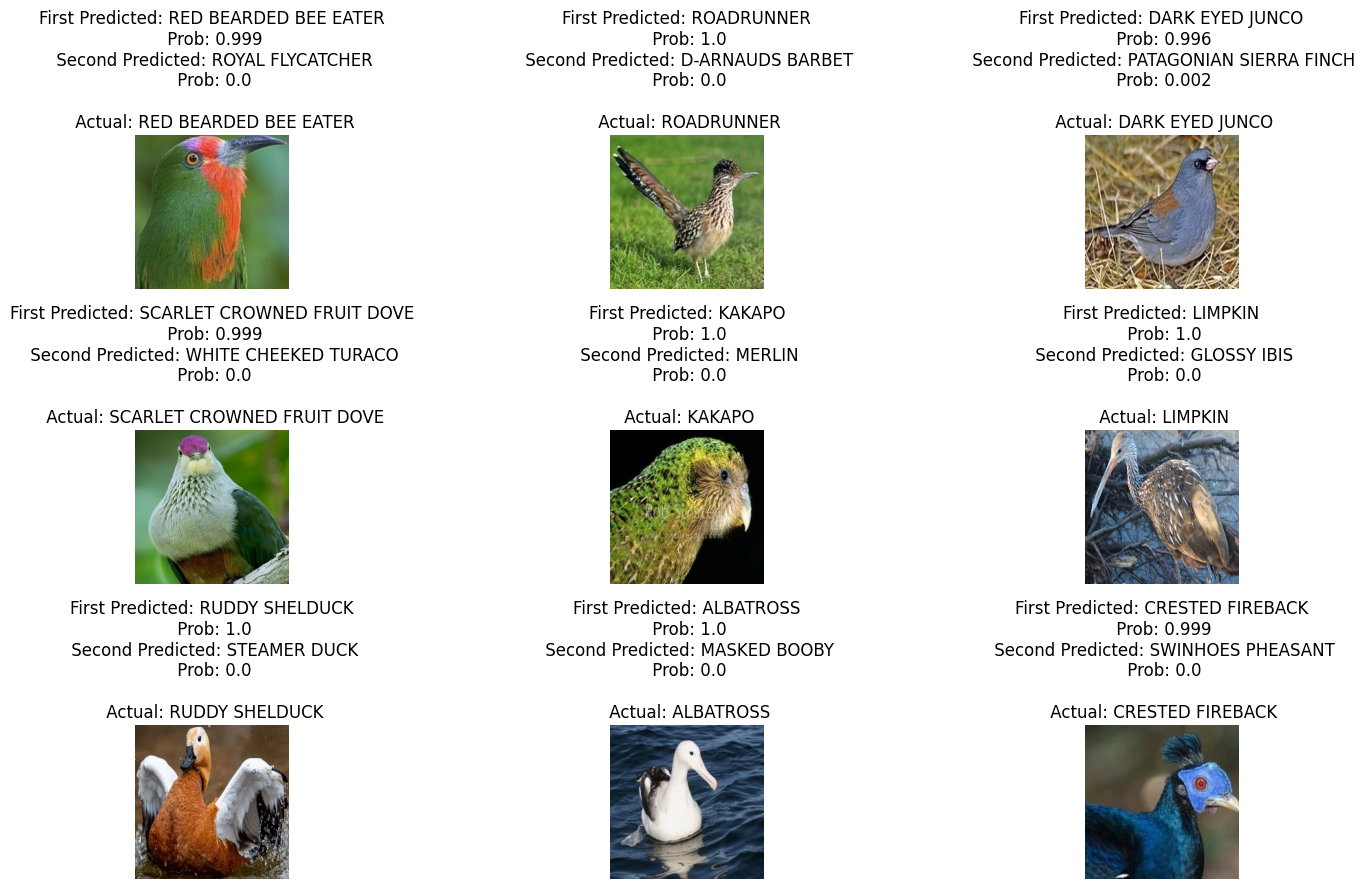

In [ ]:
fig, axes = plt.subplots(3, 3, figsize= (16,9))
for ax in axes.reshape(-1):
    filename, label = valid_df.sample(1).loc[:,['filepaths', 'labels']].values[0]
    img = load_img(filename, target_size=(224,224))
    imgconv = img_to_array(img)
    img_array = np.expand_dims(imgconv,axis=0)
    prediction = modelo_EFB3.predict(img_array)
    pred_class = np.argmax(prediction)
    pred_class_2 = np.argpartition(prediction[0,:], -2)[-2]
    pred_proba = np.max(prediction)
    pred_proba_2 = np.partition(prediction[0,:], -2)[-2]
    ax.imshow(img)
    ax.set_title(f'First Predicted: {class_names[pred_class]}\n Prob: {truncate_float(pred_proba,3)}\n Second Predicted: {class_names[pred_class_2]}\n Prob: {truncate_float(pred_proba_2,3)}\n\n Actual: {label}')
    ax.axis("off")

fig.tight_layout()
fig.show()

In [ ]:
modelo_EFB3.save('./modelo_EFB3_525_rescale_9368.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip freeze | grep tensorflow

tensorflow @ https://storage.googleapis.com/colab-tf-builds-public-09h6ksrfwbb9g9xv/tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl#sha256=a2ec79931350b378c1ef300ca836b52a55751acb71a433582508a07f0de57c42
tensorflow-datasets==4.9.4
tensorflow-estimator==2.15.0
tensorflow-gcs-config==2.15.0
tensorflow-hub==0.16.1
tensorflow-io-gcs-filesystem==0.36.0
tensorflow-metadata==1.14.0
tensorflow-probability==0.23.0
